<a href="https://colab.research.google.com/github/JuniorTorresMTJ/TowerBank/blob/main/TowerBank_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
***
#TowerBank - Criação do Modelo Preditivo
***
***

<img src="https://raw.githubusercontent.com/JuniorTorresMTJ/TowerBank/main/img/TowerBankLog.png" alt="win" width="800"/>

***
#OBJETIVO
***

***
#IMPORTAÇÃO DAS BIBLIOTECAS
***

In [1]:
import pandas            as pd
import numpy             as np
from google.colab import files
from scipy import stats
from sklearn.pipeline import Pipeline

#bibliotecas de visualização

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn           as sns

#Bibliotecas de Pré-processamento

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

#Bibliotecas de Modelo de Machine Learning

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Bibliotecas de Avaliação do Modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


***
#DADOS
***

In [2]:
df_credito = pd.read_csv('https://raw.githubusercontent.com/JuniorTorresMTJ/TowerBank/main/dados/dados_clientes_targets.csv')


***
#PRÉ-PROCESSAMENTO
***

In [3]:
df_credito.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [4]:
colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']
colunas_categoricas_binarias

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [5]:
colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']
colunas_categoricas_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [6]:
colunas_continuas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [7]:
colunas_categoricas = ['Tem_Carro', 'Tem_Casa_Propria',
                       'Categoria_de_renda', 'Grau_Escolaridade',
                       'Estado_Civil', 'Moradia','Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                       'Ocupacao']

In [8]:
df_registro_clientes_targets = df_credito[['ID_Cliente'] + colunas_continuas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


In [9]:
#!pip install scikit-learn==0.23.2 imbalanced-learn==0.7.0

In [10]:
SEED = 1561651

In [33]:
SEED = 1561651
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']

    #OverSample
    smt = SMOTE()
    x, y = smt.fit_resample(x, y)
    sns.countplot(y)

    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))



In [12]:

    #feat = pd.Series(modelo.best_estimator_._final_estimator.feature_importances_, index = x_train.columns)
    #ax = feat.nlargest(40).sort_values(ascending = True).plot(kind = 'barh',
    #                                                          figsize = (15, 9), color='#801e7d')
    #plt.title('Escolha de variáveis', fontsize = 22)
    #sns.despine()
    #plt.show()
    

In [13]:
# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()

In [17]:
def encoder(coluna):
  df_registro_clientes_targets[coluna] = le.fit_transform(df_registro_clientes_targets[coluna])

In [18]:
encoder('Grau_Escolaridade')
encoder('Categoria_de_renda')
encoder('Estado_Civil')
encoder('Moradia')
encoder('Ocupacao')

In [20]:
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,1,1,0,2,15,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,0,1,2,2,18,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,0,1,2,2,18,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,3,2,1,2,12,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,3,2,1,2,12,0


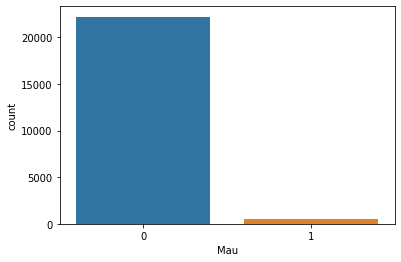

In [28]:
df_registro_clientes_targets['Mau'].value_counts()
sns.countplot(df_registro_clientes_targets['Mau'])

In [23]:
def roda_modelo_sem_balancear(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']
    
       
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))


AUC 0.8303292306790933
KS Ks_2sampResult(statistic=0.979071403447063, pvalue=0.0)


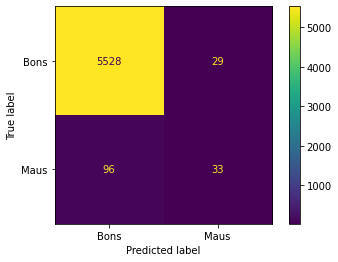


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.53      0.26      0.35       129

    accuracy                           0.98      5686
   macro avg       0.76      0.63      0.67      5686
weighted avg       0.97      0.98      0.97      5686



In [24]:
roda_modelo_sem_balancear(RandomForestClassifier(random_state=SEED), df_registro_clientes_targets)

AUC 0.9952560498417279
KS Ks_2sampResult(statistic=0.02078646630072889, pvalue=0.016431959516345865)


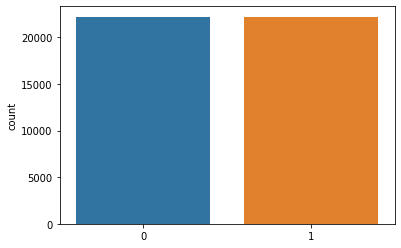

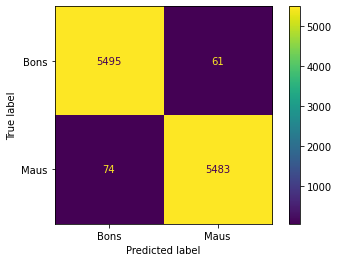


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5556
           1       0.99      0.99      0.99      5557

    accuracy                           0.99     11113
   macro avg       0.99      0.99      0.99     11113
weighted avg       0.99      0.99      0.99     11113



In [34]:
roda_modelo(RandomForestClassifier(random_state=SEED), df_registro_clientes_targets)